<a href="https://colab.research.google.com/github/Sar314/1D_heat_eqn/blob/main/1D_heat_equation_fourier_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# variables
L = np.pi   # rod length (3 in this case so that the final plot is symmetric and shows the oscillations from the initial conditions)
T = .5      # total time (s)
chi = 1     # thermal diffusivity constant  
N = 10      # number of spatial steps
M = 10      # number of time steps
dx = L/N    # space steps
dt = T/M    # time steps
alpha = chi*dt/dx**2
t_bound = 0.5 # tab for Dirchelet condition

############################# Source ###############################
def S(x):                                 # Gaussian Source 
  sigma = 0.3                             # FWHM
  return np.exp(-(x-1.5)**2/(2*sigma))    # centered at 1.5

def H(x):                                 # Step function source
  h = np.heaviside(x-2,0.5)               # step up at x=2
  return h

####################################################################

# Initial condition
u_0 = np.zeros(N)

x = np.linspace(0,L,N)
t = np.linspace(0,T,M)

for i in range(N):
  u_0[i] = np.cos(np.pi*x[i])
u_0[-1] = t_bound
u_0[0] = u_0[1]


In [3]:
import scipy.integrate as integrate

def i_c(x):   # initial condition
  return np.cos(np.pi*x)

def integrand(y,x,t):   # integrand for inverting the ft
  return (1/np.sqrt(4*np.pi*chi*t))*i_c(y)*np.exp(-((x-y)**2)/(4*chi*t))

u_1 = np.zeros(N)     # array for x values at a single points in time
u_2 = np.zeros((M,N)) # final array of all points
u_2[0,:] = u_0        # initial condition at t=0


The cell below finds a solution to the heat equation without a source term, while the following cell finds a solution with a source.

Either run the cell below or the one after it, but not both.

In [ ]:
# Without source
def u(x,t):     # inverting the ft
      return integrate.quad(integrand, -np.inf, np.inf, args=(x,t))
   
for j in range(1,M):
  for i in range(1,N-1):
    u_1[i] = u(x[i],t[j])[0]
    
    u_1[0] = u_1[1]     # Neuman
    u_1[-1] = t_bound   # Dirichlet
  u_2[j,:] = u_1    # full matrix
  plt.plot(x, u_2[j,:], '.-')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:865: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:865: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/scipy

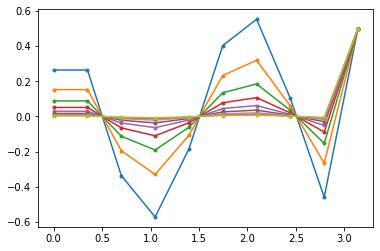

In [12]:

# With Source
def integrand_2(y,z,x,t):
  return (1/np.sqrt(4*np.pi*chi*(t-z)))*np.exp(-((x-y)**2)/(4*chi*(t-z)))*H(x)

def a(x,t):
      return integrate.quad(integrand, -np.inf, np.inf, args=(x,t))
    
def b(x,t):
  return integrate.dblquad(integrand_2,-np.inf,np.inf,lambda y: 0, lambda y: t,args=(x,t))

def u(x,t):
  return a(x,t) + b(x,t)
   

h = np.zeros(N)     # making a source array
for i in range(N):
  h[i] = H(x[i])
u_0 = u_0 + h       # initial condition with source

u_2[0,:] = u_0

for j in range(1,M):
  for i in range(1,N-1):
    u_1[i] = u(x[i],t[j])[0]
    
    u_1[0] = u_1[1]
    u_1[-1] = t_bound
    #plt.plot(x,u_1)
  u_2[j,:] = u_1
  plt.plot(x, u_2[j,:], '.-')




